In [519]:
library(ISLR)
data("Weekly")

# 10a) 

Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?
 - Year and volume appear to have a positive association and are highly correlated.

In [520]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [521]:
length(Weekly$Year)

[1] 1089

In [522]:
cor(Weekly[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


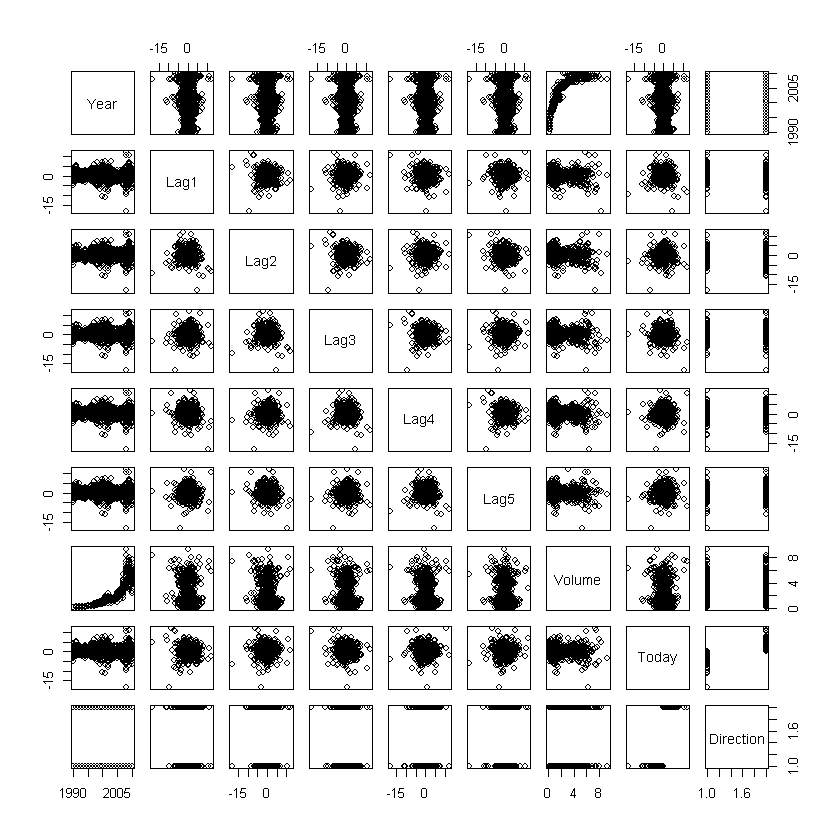

In [523]:
plot(Weekly)

# 10b) 

Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plush Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

  - Only lag 2 appears to be statistically significant.

In [524]:
options(scipen = 999)

In [525]:
# ref: p158
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Weekly, family=binomial)
summary(glm.fit)

glm.prob = predict(glm.fit, type="response")
glm.pred = rep("Down", length(Weekly$Direction))
glm.pred[glm.prob > 0.5] = "Up"


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


# 10c)

Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. 
  - The fraction of correction predictions is ~56.1%
  - Type I error - the model has good specificity (~92%), incorrectly predicting the upward trend at a rate of 8% (FPR) 
  - Type II error - the model has poor sensitivity (~11%), incorrectly predicting the downward trend 89% of the time (FNR) 
  

In [529]:
y_pred <- glm.pred
y_true <- Weekly$Direction
    
cm = table(y_pred, y_true)
cm
mean(y_pred==y_true)

      y_true
y_pred Down  Up
  Down   54  48
  Up    430 557

[1] 0.5610652

In [530]:
TP = cm[1]
FN = cm[2] # Type II
FP = cm[3] # Type I
TN = cm[4]

err = (FP + FN)/(TP+TN+FN+FP)
err

mean(y_pred!=y_true)

[1] 0.4389348

[1] 0.4389348

In [531]:
sensitivity = TP/(FN+TP) # recall
FNR = FN/(TP+FN)

sensitivity; FNR

[1] 0.1115702

[1] 0.8884298

In [532]:
specificity = TN/(TN+FP)
FPR = FP/(FP+TN)

specificity; FPR

[1] 0.9206612

[1] 0.07933884

# 10d)

Now fit the logistic regression model using a training data period from 1990 to 2008 with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of the correct predictions for the held out data (that is, the data from 2009 and 2010)

In [533]:
# ref p159
X_train = (Weekly$Year<=2008)
holdout = !X_train
X_test = Weekly[holdout,]
y_test = Weekly$Direction[holdout]

In [534]:
glm.fit = glm(formula=Direction~Lag2, data=Weekly, family=binomial, subset=X_train)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = X_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [535]:
glm.probs = predict(glm.fit, X_test, type="response")
glm.pred = rep("Down", length(y_test))
glm.pred[glm.probs > 0.5] = "Up"

glm.cm = table(glm.pred, y_test)
glm.cm
mean(glm.pred == y_test)
mean(glm.pred != y_test)

        y_test
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

[1] 0.375

# 10e)

Repeat (d) using LDA

In [536]:
library('MASS')

In [537]:
# ref p161
lda.fit = lda(Direction ~ Lag2, data=Weekly, subset=X_train)
lda.pred = predict(lda.fit, X_test)$class

lda.cm = table(lda.pred, y_test)
lda.cm

mean(lda.pred == y_test)
mean(lda.pred != y_test)

        y_test
lda.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

[1] 0.375

# 10f)

Repeat (d) using QDA

In [538]:
qda.fit = qda(Direction ~ Lag2, data=Weekly, subset=X_train)
qda.pred = predict(qda.fit, X_test)$class

qda.cm = table(qda.pred, y_test)
qda.cm

mean(qda.pred == y_test)
mean(qda.pred != y_test)

        y_test
qda.pred Down Up
    Down    0  0
    Up     43 61

[1] 0.5865385

[1] 0.4134615

# 10g)

Repeat (d) using KNN with K=1

In [539]:
# ref p164
library(class)

set.seed(1) # random seed

train.X = cbind(Weekly$Lag1, Weekly$Lag2)[X_train ,]
test.X = cbind(Weekly$Lag1, Weekly$Lag2)[!X_train ,]
train.Direction = Weekly$Direction[X_train]
test.Direction = Weekly$Direction[!X_train]

knn.pred = knn(train.X, test.X, train.Direction, k=1)

knn.cm = table(knn.pred, test.Direction)
knn.cm

mean(knn.pred == test.Direction)
mean(knn.pred != test.Direction)

        test.Direction
knn.pred Down Up
    Down   18 29
    Up     25 32

[1] 0.4807692

[1] 0.5192308

# 10h)

Which of these methods appears to provide the best results on this data?

  - In this case, the generalized linear model and LDA produce identical results. Both have a smaller error rate and higher overall correct prediction rate compared to the QDA and KNN models.

# 10i)
Experiment with different combinations of predictions, including possible transformations and interactions, for each of the methods. Report the variables, method and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

 - Considering that only lag2 was significant, it is unlikely that other combinations of attributes will improve performance. As such, exploring the more flexible non-parametric approach has promise. Search for values for K, we find a comparable (slightly better) model when k=29 

### Experiment 1 - Best value for K

In [540]:
# square root method
sqrt(length(Weekly$Direction))

[1] 33

In [541]:
errs = c(Inf)
cprs = c(0)
for(k in 1:99) {  
    knn.pred = knn(train.X, test.X, train.Direction, k=k)
    knn.cm = table(knn.pred, test.Direction)

    cpr = mean(knn.pred == test.Direction)
    err = mean(knn.pred != test.Direction)
    
    errs[[length(errs) + 1]] <- c(k=err)
    cprs[[length(cprs) + 1]] <- c(k=cpr)   
}


min(errs)
match(min(errs), errs)

max(cprs)
match(max(cprs), cprs)

[1] 0.375

[1] 26

[1] 0.625

[1] 26

# 11a)

Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [542]:
mpg01 = rep(0, length(Auto$mpg))
mpg01[Auto$mpg > median(Auto$mpg)] = 1

df = data.frame(Auto, mpg01)

# 11b)

Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
  - Visually, we can see that displacement, horsepower, and weight, have some directionality and association. Additionally, we can see that three are likely monotonically linked to one another. The relationships are clearly displayed when we boxplot mpg01 against each feature, respectively. 

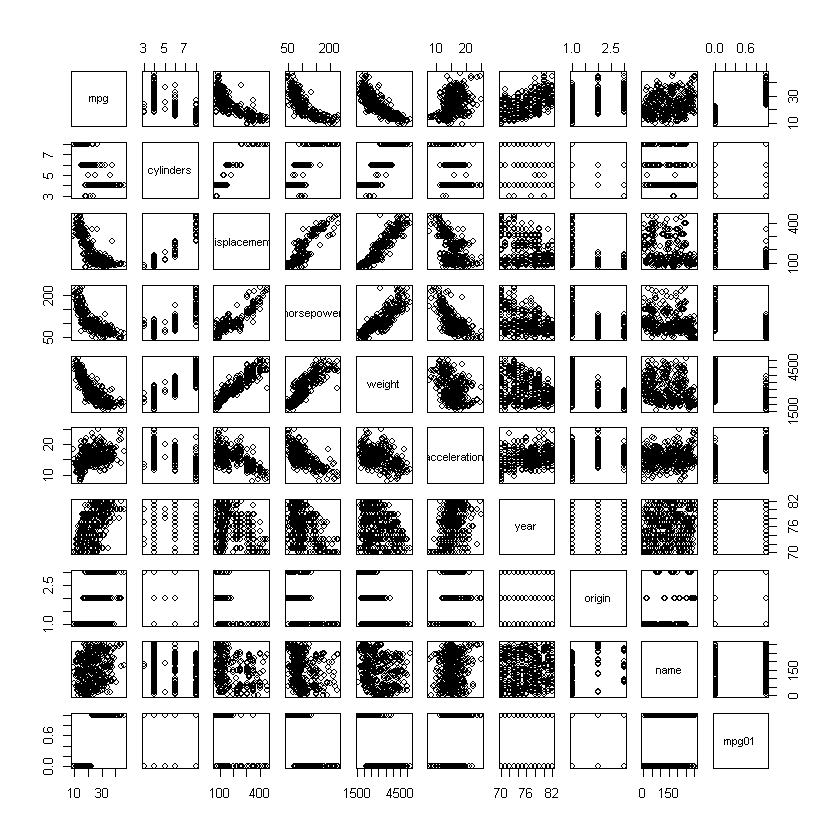

In [543]:
plot(df)

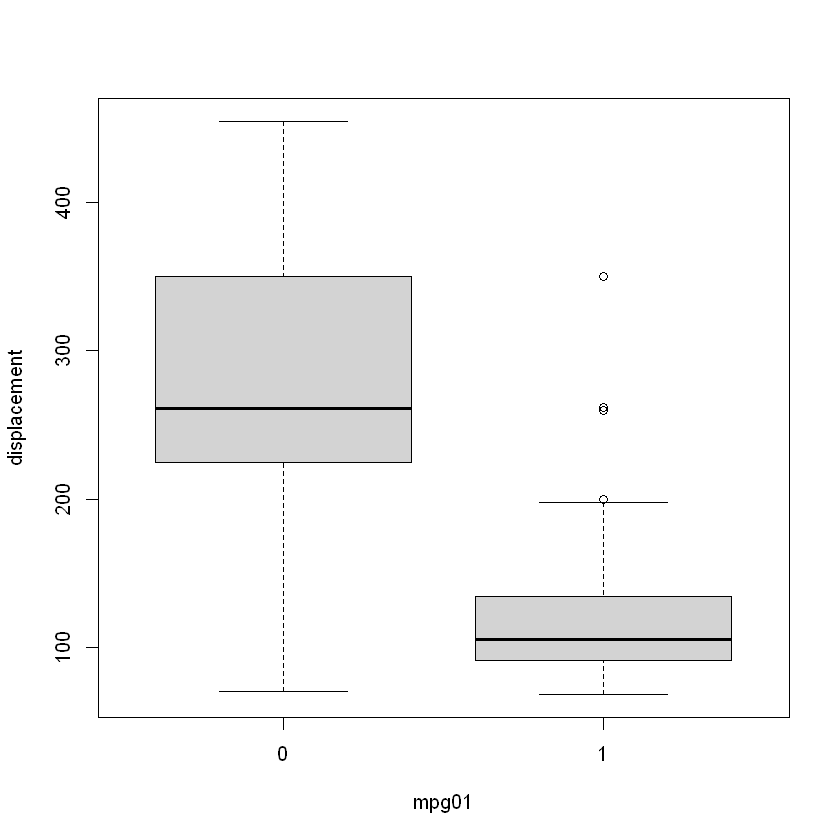

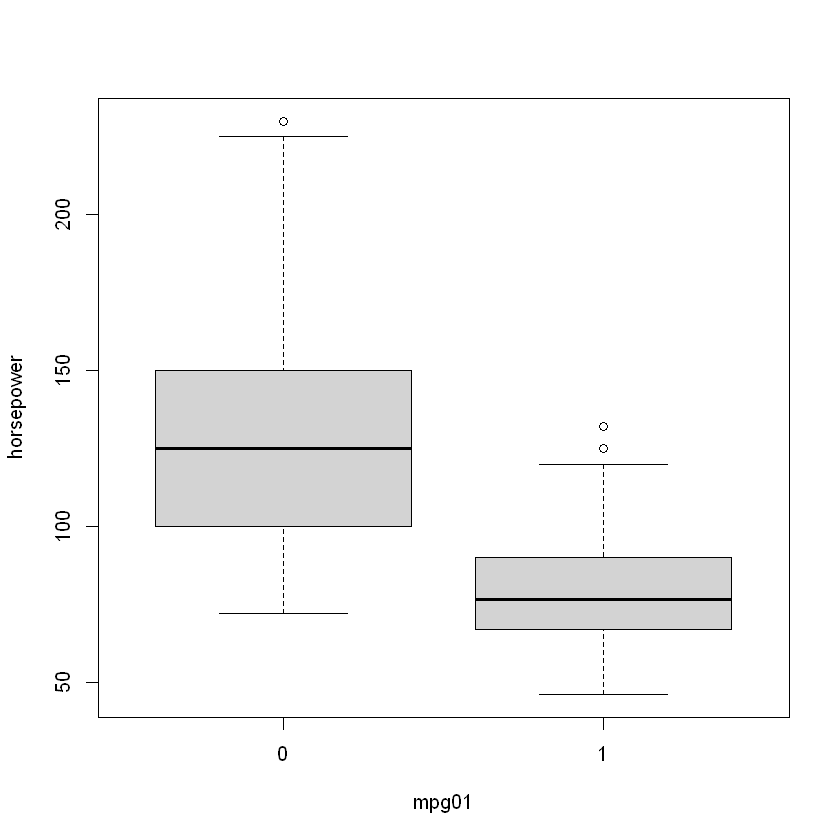

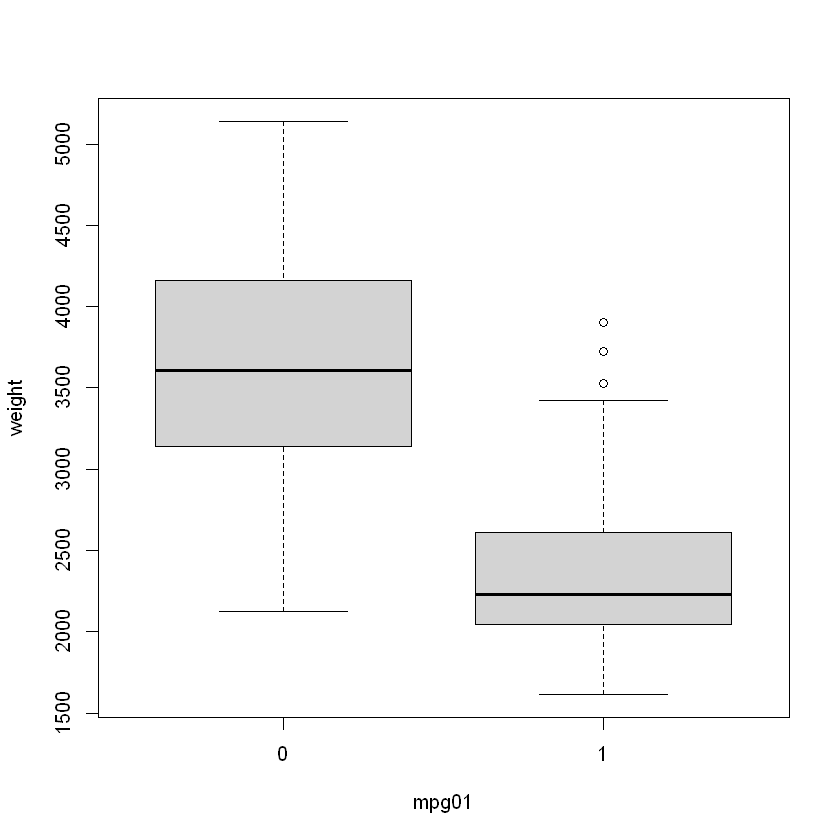

In [544]:
boxplot(displacement ~ mpg01, data=df)
boxplot(horsepower ~ mpg01, data=df)
boxplot(weight ~ mpg01, data=df)

# 11c)

Split the data into a training set and a test set.

In [583]:
# ref p191
set.seed (123)

# 80/20
len = length(df$mpg01)
train = sample(len, (len * .8))
X_train = df[train,]

X_test = df[-train, ]
y_test = df$mpg01[-train]

# 11d)

Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
  - The test error is ~14%

In [582]:
lda.fit = lda(mpg01 ~ displacement + horsepower + weight, data=X_train)

lda.pred = predict(lda.fit, X_test)$class

table(lda.pred, y_test)
mean(lda.pred != y_test)

        y_test
lda.pred  0  1
       0 34  3
       1  8 34

[1] 0.1392405

# 11e)

Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

  - The test error is ~11.4%

In [550]:
qda.fit = qda(mpg01 ~ displacement + horsepower + weight, data=X_train)

qda.pred = predict(qda.fit, X_test)$class

table(qda.pred, y_test)
mean(qda.pred != y_test)

        y_test
qda.pred  0  1
       0 37  4
       1  5 33

[1] 0.1139241

# 11f)

Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

  - The error obtained is ~13.9%

In [567]:
glm.fit = glm(mpg01 ~ displacement + horsepower + weight, data=X_train)

glm.prob = predict(glm.fit, X_test, type="response")
glm.pred = rep(0, length(y_test))
glm.pred[glm.prob > 0.5] = 1

table(glm.pred, y_test)
mean(glm.pred != y_test)

        y_test
glm.pred  0  1
       0 34  3
       1  8 34

[1] 0.1392405

# 11g)

Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?
 - The minimum test error obtained occurs at K=10 and is ~12.7%

In [576]:
train.X = cbind(X_train$displacement, X_train$horsepower, X_train$weight)
test.X = cbind(X_test$displacement, X_test$horsepower, X_test$weight)
train.mpg01 = X_train$mpg01
test.mpg01 = X_test$mpg01

errs = c(Inf)
for(k in 1:99) {  
    knn.pred = knn(train.X, test.X, train.mpg01, k=k)
    err = mean(knn.pred != test.mpg01)
    
    errs[[length(errs) + 1]] <- c(k=err)
    
    # print(k)
    # print(err)
}


min(errs)
match(min(errs), errs)

[1] 0.1265823

[1] 10

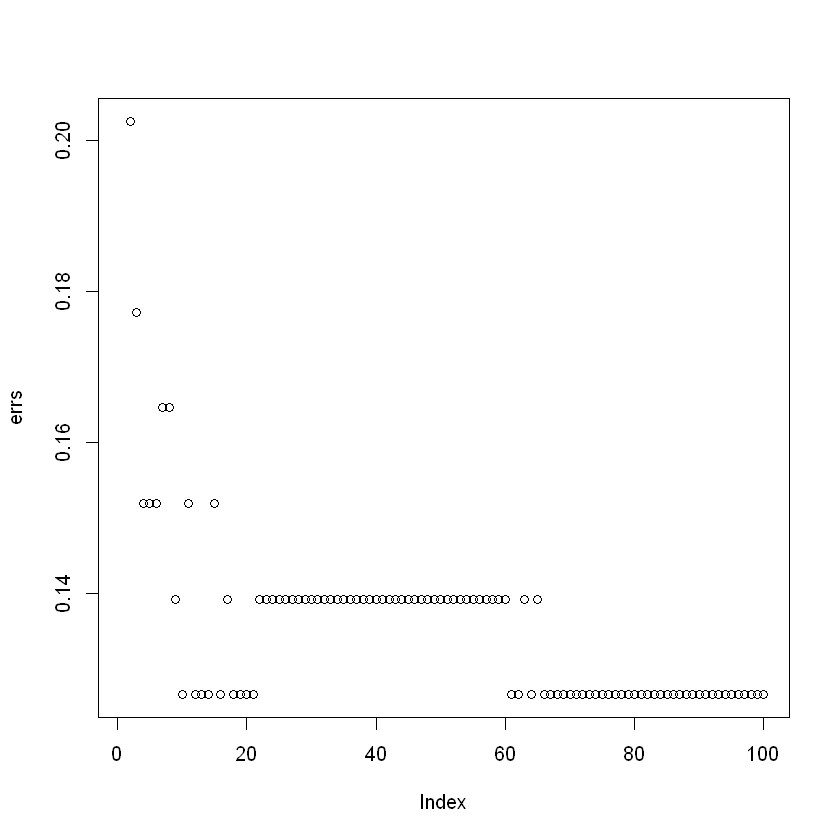

In [577]:
plot(errs)